In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
address = 'E:\\University Semester\\8\\Foundation of Computer Vision\\Homeworks\\HW3 - Gamma Correction\\rice.png'

In [3]:
gray_image = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
gray_image.shape

(700, 994)

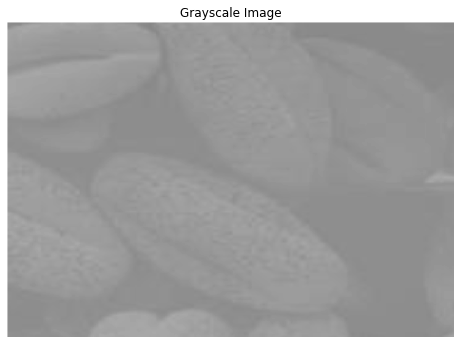

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [5]:
def gamma_correction(image, gamma):
    corrected_image = np.power(image / 255.0, gamma) * 255
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image

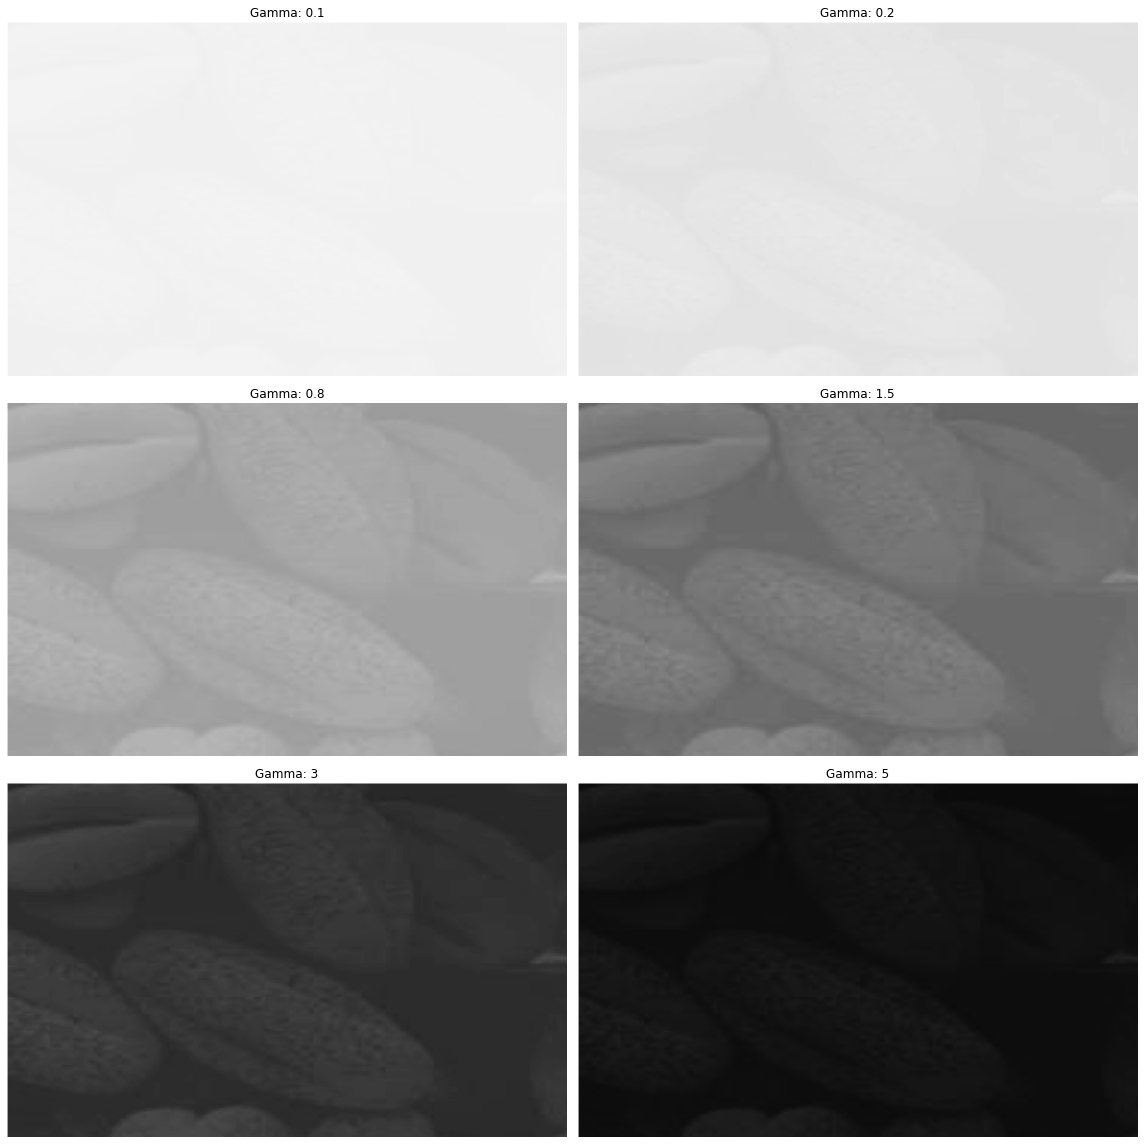

In [6]:
gamma_values = [0.1, 0.2, 0.8, 1.5, 3, 5]

num_rows = len(gamma_values) // 2
if len(gamma_values) % 2 == 0:
    num_cols = 2
else:
    num_cols = 3


plt.figure(figsize=(16, 16))
for i, gamma in enumerate(gamma_values):
    gamma_corrected_image = gamma_correction(gray_image, gamma)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(gamma_corrected_image, cmap='gray', aspect='auto', vmin=0, vmax=255)
    plt.title('Gamma: {}'.format(gamma))
    plt.axis('off')

plt.tight_layout()
plt.show()

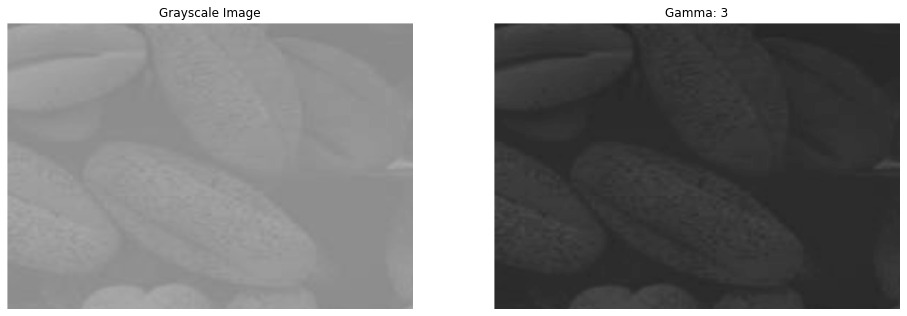

In [7]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')


gamma_corrected_image = gamma_correction(gray_image, 3)
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma: 3')
plt.axis('off')

plt.show()

In [8]:
histogram = np.zeros(256)
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        histogram[gray_image[i][j]] += 1

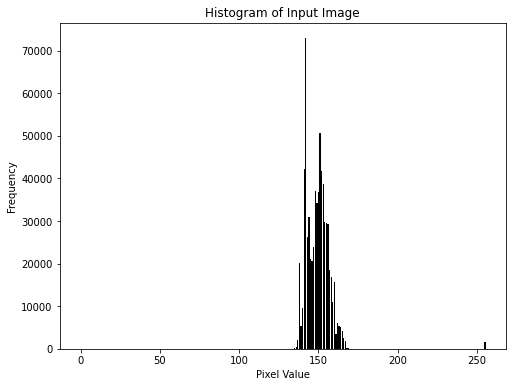

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Input Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
address_2 = 'E:\\University Semester\\8\\Foundation of Computer Vision\\Homeworks\\HW3 - Gamma Correction\\room.jpg'

In [11]:
gray_image = cv2.imread(address_2, cv2.IMREAD_GRAYSCALE)
gray_image.shape

(1393, 1063)

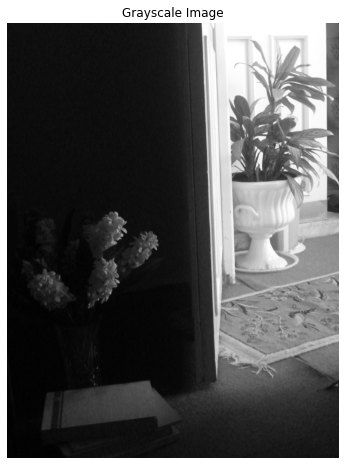

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

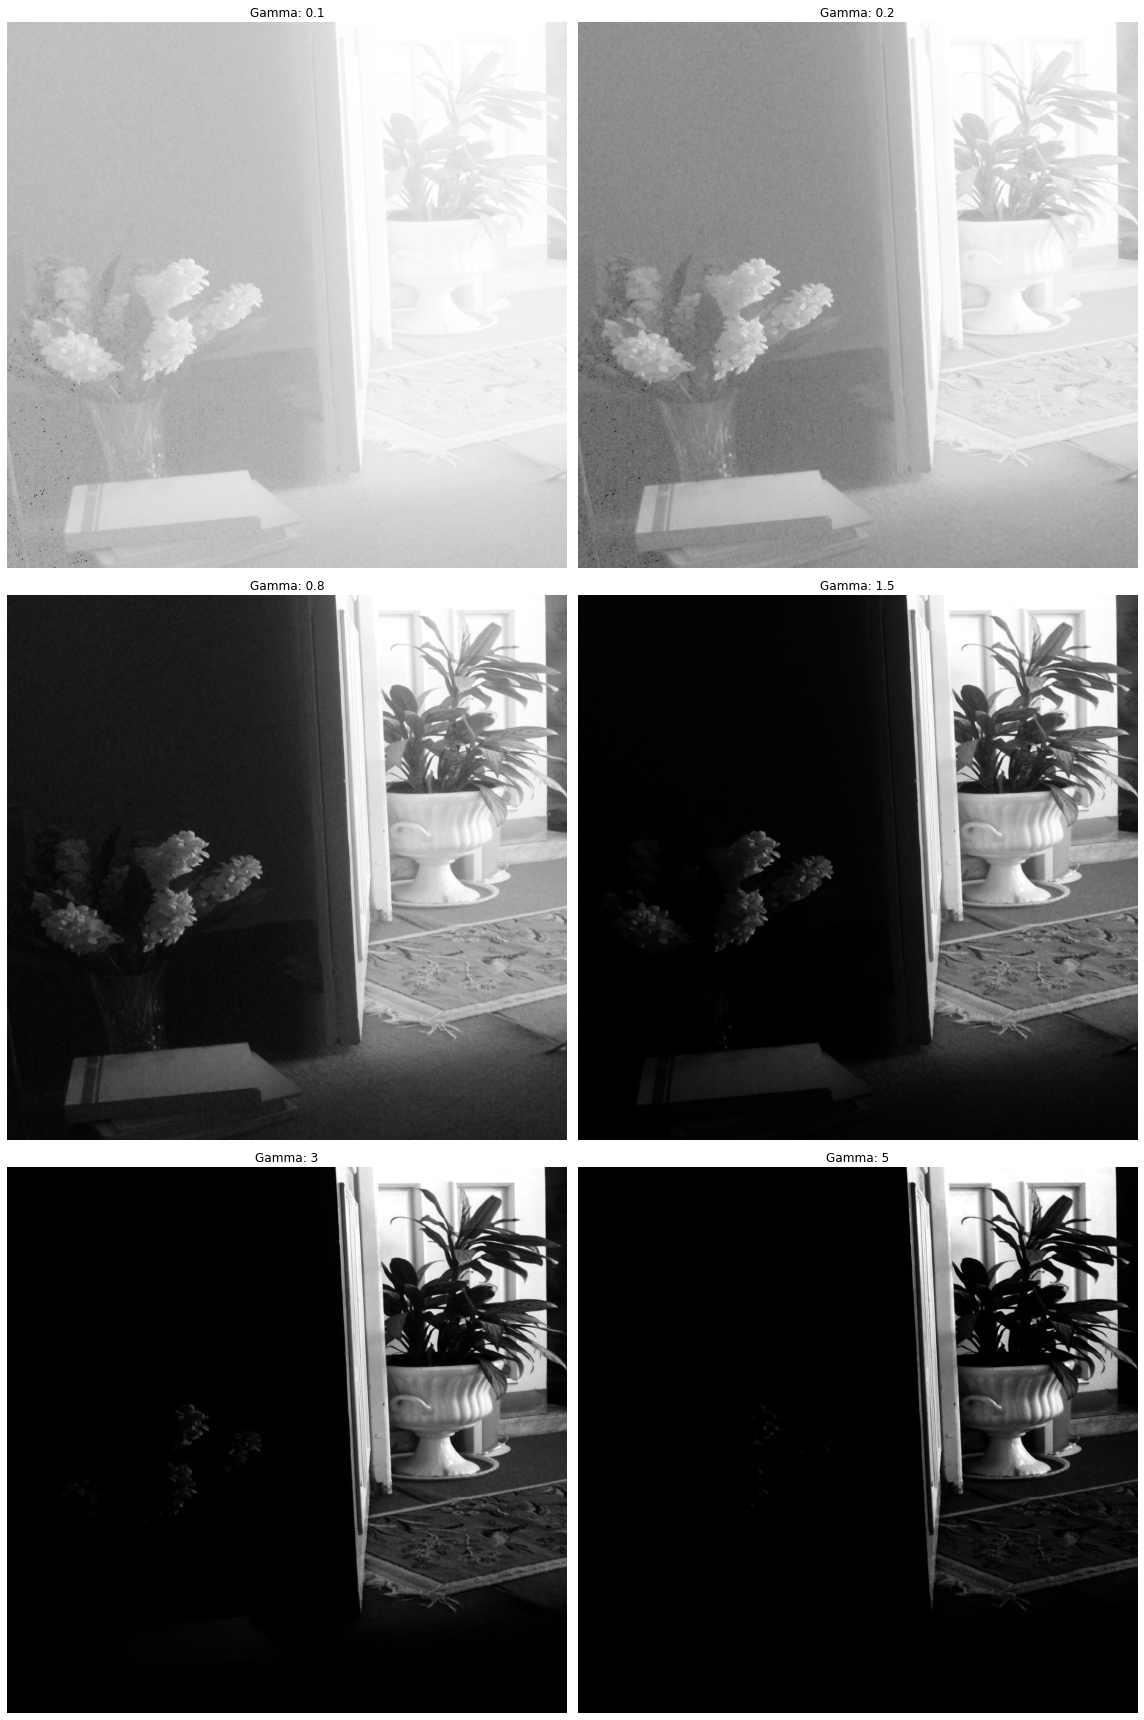

In [13]:
gamma_values = [0.1, 0.2, 0.8, 1.5, 3, 5]

num_rows = len(gamma_values) // 2
if len(gamma_values) % 2 == 0:
    num_cols = 2
else:
    num_cols = 3


plt.figure(figsize=(16, 24))
for i, gamma in enumerate(gamma_values):
    gamma_corrected_image = gamma_correction(gray_image, gamma)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(gamma_corrected_image, cmap='gray', aspect='auto', vmin=0, vmax=255)
    plt.title('Gamma: {}'.format(gamma))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
histogram = np.zeros(256)
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        histogram[gray_image[i][j]] += 1

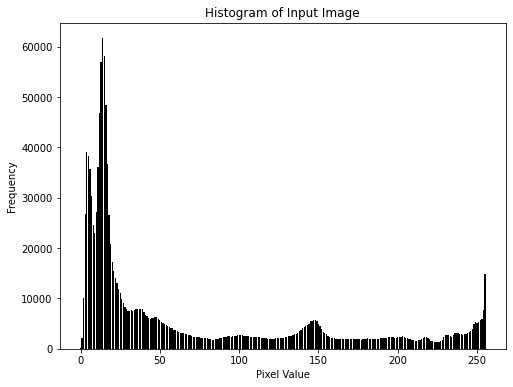

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(histogram)), histogram, color='black')
plt.title('Histogram of Input Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

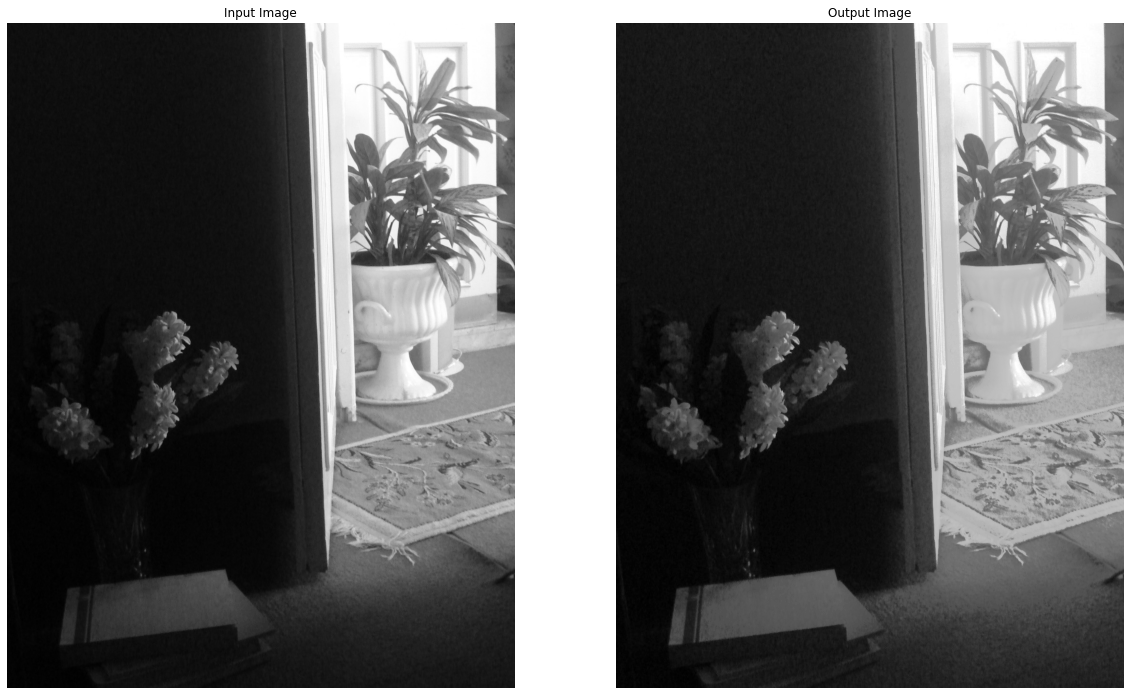

In [16]:
pixel_mappings = [
    (0, 50, 0, 80),
    (51, 125, 81, 124),
    (126, 150, 125, 175),
    (151, 225, 176, 199),
    (226, 255, 200, 255)
]

output_image = gray_image.copy()
for start_in, end_in, start_out, end_out in pixel_mappings:
    output_image = np.where((gray_image >= start_in) & (gray_image <= end_in),
                            ((gray_image - start_in) / (end_in - start_in)) * (end_out - start_out) + start_out,
                            output_image)

output_image = np.uint8(output_image)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255)
plt.title('Output Image')
plt.axis('off')

plt.show()

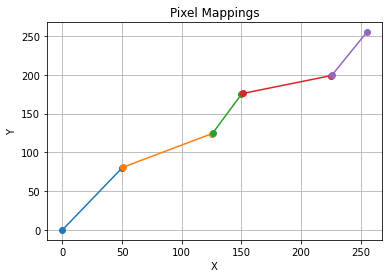

In [17]:
# Define the pixel mappings
pixel_mappings = [
    (0, 50, 0, 80),
    (51, 125, 81, 124),
    (126, 150, 125, 175),
    (151, 225, 176, 199),
    (226, 255, 200, 255)
]

# Plot the pixel mappings
fig, ax = plt.subplots()

for mapping in pixel_mappings:
    x1, x2, y1, y2 = mapping
    ax.plot([x1, x2], [y1, y2], marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Pixel Mappings')

plt.grid(True)
plt.show()
